In [33]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLMentions15up = pd.read_csv('queries_results/global/GLOBAL monthyear eventsMentions15up.csv', header = 0,sep=' *, *')
GLMentions15up["Time"]=pd.to_datetime(GLMentions15up['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

GLEventsMonthyearAc1 = pd.read_csv('queries_results/global/GLOBAL monthyear events.csv', header = 0,sep=' *, *')
GLEventsMonthyearAc1["Time"]=pd.to_datetime(GLEventsMonthyearAc1['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

GL = GLMentions15up.merge(GLEventsMonthyearAc1, on=["Time", "Actor1CountryCode"], suffixes=('','Global'))
GL["Percentage"] = GL.EventsMentions15up/GL.Events*100

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


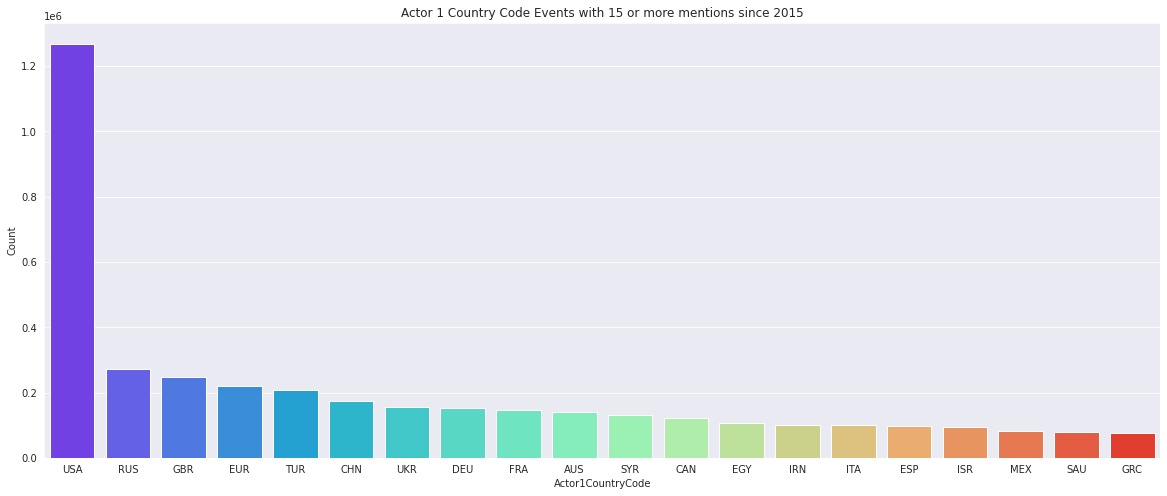

In [34]:
s = GL.groupby("Actor1CountryCode").sum().sort_values(by="EventsMentions15up", ascending=False).head(20)
g = sns.barplot(s.index, s.EventsMentions15up, palette='rainbow')
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

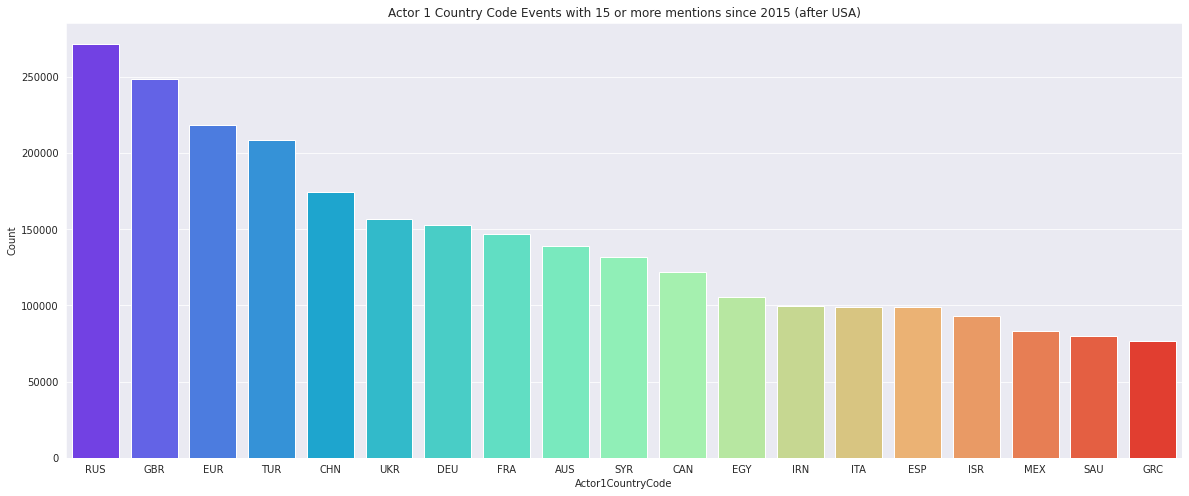

In [35]:
s = GL.groupby("Actor1CountryCode").sum().sort_values(by="EventsMentions15up", ascending=False).head(20)[1:]
g = sns.barplot(s.index, s.EventsMentions15up, palette='rainbow')
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015 (after USA)")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

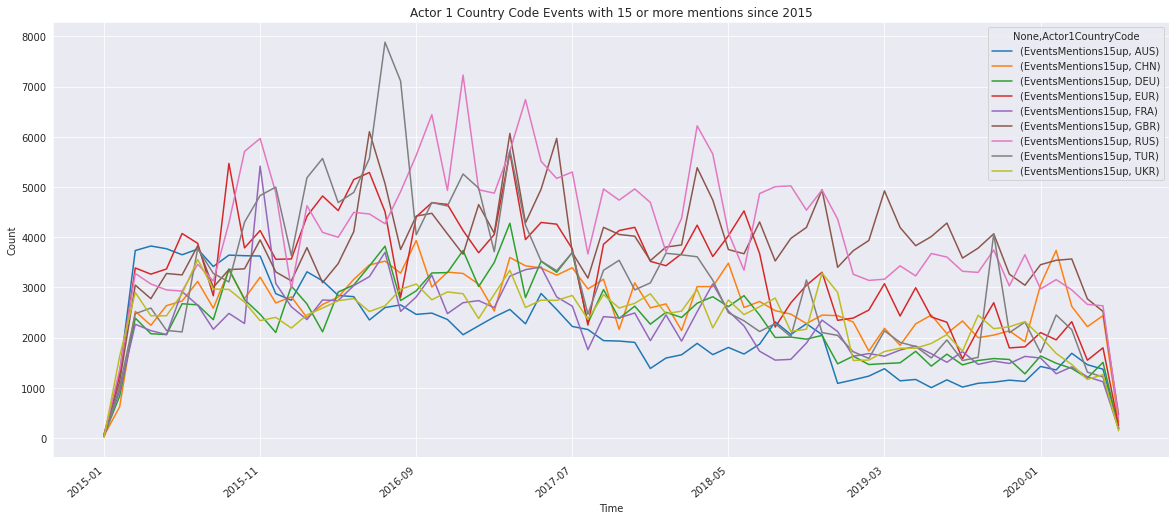

In [36]:
cols = GL.groupby("Actor1CountryCode", as_index=False).sum().sort_values(by="EventsMentions15up", ascending=False).head(10)[1:]["Actor1CountryCode"]
s  = GL.loc[GL["Actor1CountryCode"].isin(cols)]

s = s.groupby(["Time","Actor1CountryCode"]).agg({'EventsMentions15up':'sum'})
g = s.unstack().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)


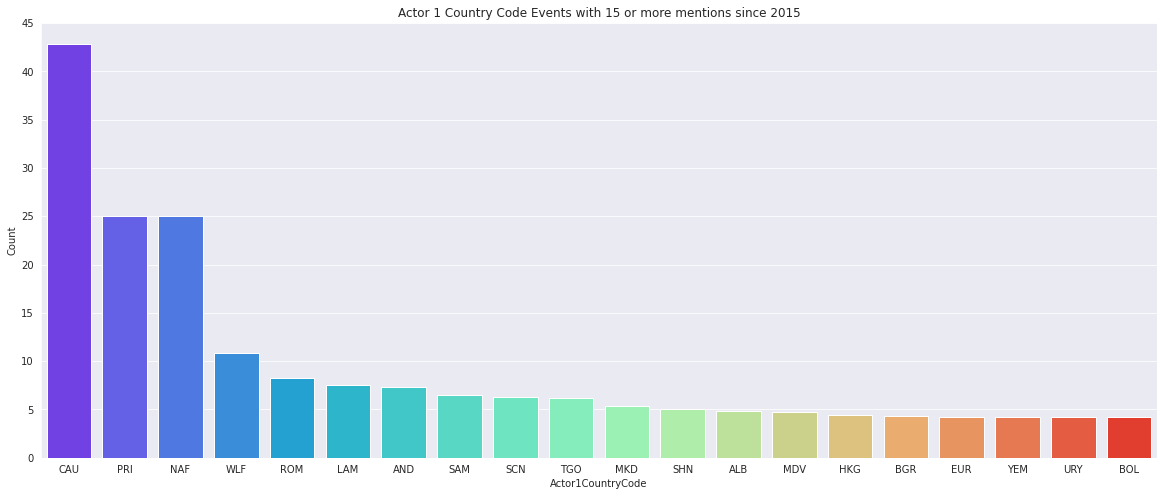

In [47]:
s = GL.groupby("Actor1CountryCode").sum()
s["Percentage"] = s.EventsMentions15up/s.Events*100
s = s.sort_values(by="Percentage", ascending=False).head(20)
g = sns.barplot(s.index, s.Percentage, palette='rainbow')
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015")
g.set(ylabel='Percentage')
g.figure.set_size_inches(20,8)

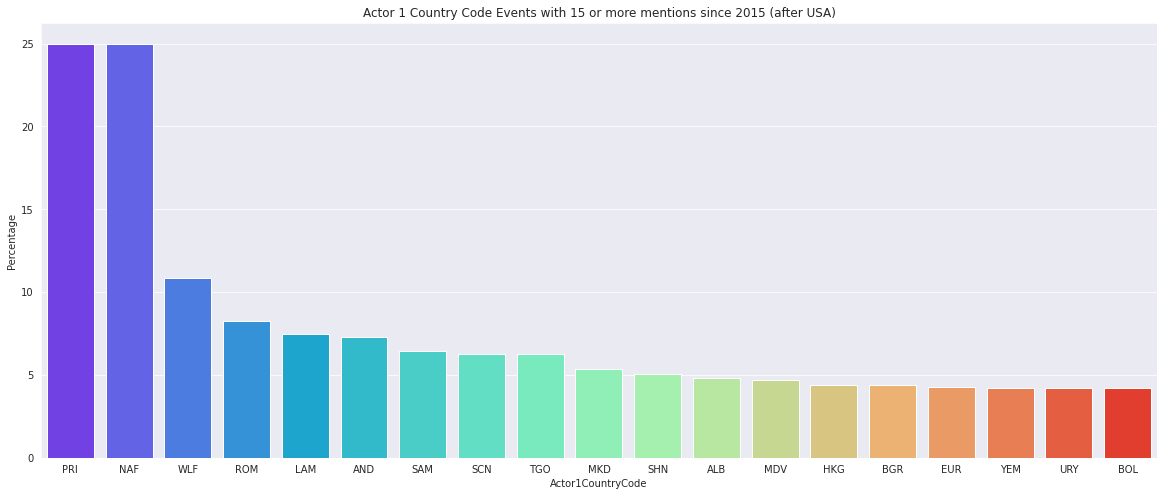

In [48]:
s = GL.groupby("Actor1CountryCode").sum()
s["Percentage"] = s.EventsMentions15up/s.Events*100
s=s.sort_values(by="Percentage", ascending=False).head(20)[1:]
g = sns.barplot(s.index, s.Percentage, palette='rainbow')
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015 (after USA)")
g.set(ylabel='Percentage')
g.figure.set_size_inches(20,8)

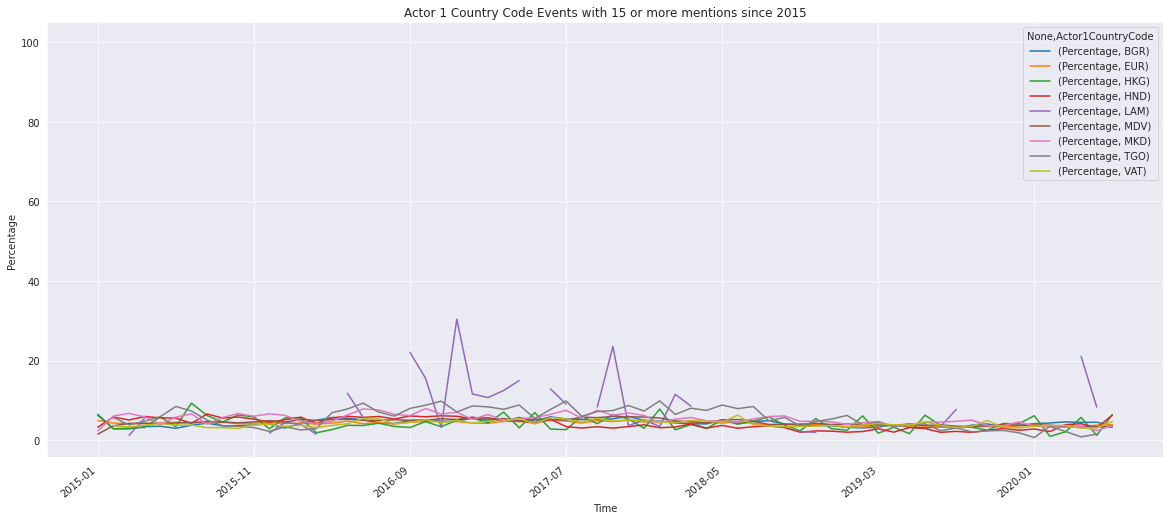

In [49]:
cols = GL.groupby("Actor1CountryCode", as_index=False).sum().sort_values(by="Percentage", ascending=False).head(10)[1:]["Actor1CountryCode"]
s  = GL.loc[GL["Actor1CountryCode"].isin(cols)]

s = s.groupby(["Time","Actor1CountryCode"]).agg({'Percentage':'sum'})
g = s.unstack().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.set_title("Actor 1 Country Code Events with 15 or more mentions since 2015")
g.set(ylabel='Percentage')
g.figure.set_size_inches(20,8)
